# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [104]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [105]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739411e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343912e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29:00,33.44,2.005066e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149245e+12,34,Urban
4,South Jack,2019-03-06 4:28:00,34.58,3.908451e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [106]:
#  1. Get the total rides for each city type
total_rides_by_type=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

print(f"The total rides for each city: {total_rides_by_type}")

The total rides for each city: type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [107]:
# 2. Get the total drivers for each city type
total_drivers_by_type=city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type
print(f"The total drivers for each city:{total_drivers_by_type}")

The total drivers for each city:type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


In [108]:
#  3. Get the total amount of fares for each city type
fares_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]
fares_by_type
print(f"The total fare amount for each city:{fares_by_type}")

The total fare amount for each city:type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [109]:
#  4. Get the average fare per ride for each city type. 
avg_fares_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df.groupby(["type"]).count()["ride_id"]
#avg_fares_by_type=pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fares_by_type
print(f"The average fare for each city: {avg_fares_by_type}")

The average fare for each city: type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64


In [110]:
# 5. Get the average fare per driver for each city type. 
avg_fares_by_driver_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]/city_data_df.groupby(["type"]).sum()["driver_count"]
avg_fares_by_driver_by_type
print(f"The average fare per driver for each city: {avg_fares_by_type}")

The average fare per driver for each city: type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64


In [111]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
          "Total Rides" : total_rides_by_type,
          "Total Drivers" : total_drivers_by_type,
          "Total Fares" : fares_by_type,
          "Average Fare per Ride" : avg_fares_by_type,
          "Average Fare per Driver" : avg_fares_by_driver_by_type})

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [112]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [113]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [114]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739411e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343912e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29:00,33.44,2.005066e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149245e+12,34,Urban
4,South Jack,2019-03-06 4:28:00,34.58,3.908451e+12,46,Urban


In [115]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [116]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_by_city_date_df = pyber_data_df.groupby(['type','date']).sum()["fare"]
fare_by_city_date_df.head()

type   date               
Rural  2019-01-01 9:45:00     43.69
       2019-01-02 11:18:00    52.12
       2019-01-03 19:51:00    19.90
       2019-01-04 3:31:00     24.88
       2019-01-06 7:38:00     47.33
Name: fare, dtype: float64

In [117]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_by_city_date_df = fare_by_city_date_df.reset_index()
fare_by_city_date_df.head()

,type,date,fare
0,Rural,2019-01-01 9:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 3:31:00,24.88
4,Rural,2019-01-06 7:38:00,47.33


In [118]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_by_city_date_df = fare_by_city_date_df.pivot(index='date', columns='type', values='fare')
fare_by_city_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08:00,NaN,NaN,37.91
2019-01-01 0:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-05-08 1:54:00,NaN,NaN,32.69
2019-05-08 2:31:00,NaN,NaN,41.33
2019-05-08 4:20:00,NaN,NaN,21.99


In [119]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_by_date_df = fare_by_city_date_df.loc['1/1/19':'4/29/19']
fare_by_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08:00,NaN,NaN,37.91
2019-01-01 0:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-05-08 1:54:00,NaN,NaN,32.69
2019-05-08 2:31:00,NaN,NaN,41.33
2019-05-08 4:20:00,NaN,NaN,21.99


In [120]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fare_by_date_df.index = pd.to_datetime(fare_by_date_df.index)
fare_by_date_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [121]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_by_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [122]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_by_week_df = fare_by_date_df.resample("W").sum()
fare_by_week_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


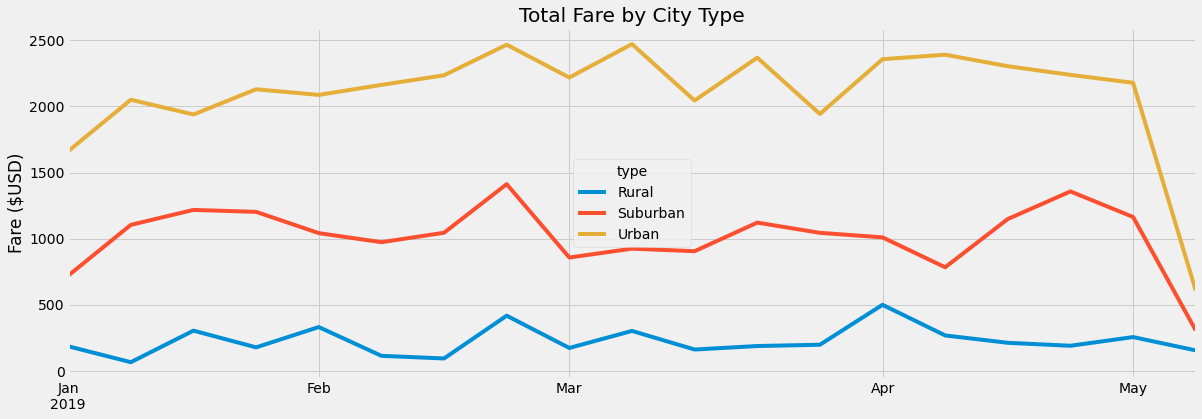

In [123]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Creating a Line chart for the resample df
fare_by_week_df.plot(figsize=(18,6))
plt.xlabel('')
plt.ylabel('Fare ($USD)')
plt.title('Total Fare by City Type')

# Save Figure
plt.savefig('PyBer_fare_summary.png');


# Show Figure
plt.show()